In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt


In [35]:
#export data files from STAR for ENSEMBL and genes
genes=pd.read_table('geneInfo.tab', sep='\t',  header=0, index_col=0)
genes

,symbol,type
gene_ID,,
ENSG00000290825.1,DDX11L2,lncRNA
ENSG00000223972.6,DDX11L1,transcribed_unprocessed_pseudogene
ENSG00000227232.5,WASH7P,unprocessed_pseudogene
ENSG00000278267.1,MIR6859-1,miRNA
ENSG00000243485.5,MIR1302-2HG,lncRNA
...,...,...
ENSG00000198695.2,MT-ND6,protein_coding
ENSG00000210194.1,MT-TE,Mt_tRNA
ENSG00000198727.2,MT-CYB,protein_coding


In [39]:
#import count file of sample into pandas
counts=pd.read_table('ReadsPerGene_H24015046_S1.tab', sep='\t',  header=None, skiprows=4)
counts.columns=['gene_ID', 'unstranded', 'stranded_f', 'stranded_r']
counts

,gene_ID,unstranded,stranded_f,stranded_r
0,ENSG00000290825.1,0,0,0
1,ENSG00000223972.6,0,0,0
2,ENSG00000227232.5,21,0,21
3,ENSG00000278267.1,0,0,0
4,ENSG00000243485.5,0,0,0
...,...,...,...,...
62691,ENSG00000198695.2,159,218,15
62692,ENSG00000210194.1,0,4,0
62693,ENSG00000198727.2,529,18,520
62694,ENSG00000210195.2,0,0,0


In [40]:
table=pd.merge(genes, counts, left_on='gene_ID', right_on='gene_ID')
table=table.drop(columns=['stranded_f', 'unstranded'])
table.rename(columns={'stranded_r':'H24016469_S7'}, inplace=True)

table

,gene_ID,symbol,type,H24016469_S7
0,ENSG00000290825.1,DDX11L2,lncRNA,0
1,ENSG00000223972.6,DDX11L1,transcribed_unprocessed_pseudogene,0
2,ENSG00000227232.5,WASH7P,unprocessed_pseudogene,21
3,ENSG00000278267.1,MIR6859-1,miRNA,0
4,ENSG00000243485.5,MIR1302-2HG,lncRNA,0
...,...,...,...,...
62691,ENSG00000198695.2,MT-ND6,protein_coding,15
62692,ENSG00000210194.1,MT-TE,Mt_tRNA,0
62693,ENSG00000198727.2,MT-CYB,protein_coding,520
62694,ENSG00000210195.2,MT-TT,Mt_tRNA,0


In [41]:
#export results as new csv file
table.to_csv('H24015046_S1.csv', index=False)


In [ ]:
# repeat for other samples as loop

In [43]:
S1=pd.read_csv('H24015046_S1_counts.csv', index_col=0,usecols=[0, 3])
S2=pd.read_csv('H24015598_S2_counts.csv', index_col=0, usecols=[0, 3])
S3=pd.read_csv('H24015825_S3_counts.csv', index_col=0, usecols=[0, 3])
S4=pd.read_csv('H24015835_S4_counts.csv', index_col=0, usecols=[0, 3])
S5=pd.read_csv('H24015885_S5_counts.csv', index_col=0, usecols=[0, 3])
S6=pd.read_csv('H24016295_S6_counts.csv', index_col=0, usecols=[0, 3])
S7=pd.read_csv('H24016469_S7_counts.csv', index_col=0, usecols=[0, 3])
S8=pd.read_csv('H24016470_S8_counts.csv', index_col=0, usecols=[0, 3])

In [44]:
S7

,H24016469_S7
gene_ID,
ENSG00000290825.1,0
ENSG00000223972.6,0
ENSG00000227232.5,27
ENSG00000278267.1,1
ENSG00000243485.5,0
...,...
ENSG00000198695.2,13
ENSG00000210194.1,0
ENSG00000198727.2,404


In [45]:
counts = pd.concat([S1, S2, S3, S4, S5, S6, S7, S8], axis=1)
counts=counts.fillna(0)
counts

,H24016469_S7,H24015598_S2,H24015825_S3,H24015835_S4,H24015885_S5,H24016295_S6,H24016469_S7,H24016470_S8
gene_ID,,,,,,,,
ENSG00000290825.1,0,0,0,0,0,0,0,0
ENSG00000223972.6,0,0,0,0,0,0,0,0
ENSG00000227232.5,21,23,101,55,42,60,27,43
ENSG00000278267.1,0,0,0,1,0,1,1,0
ENSG00000243485.5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
ENSG00000198695.2,15,15,15,26,35,15,13,45
ENSG00000210194.1,0,0,0,0,0,0,0,0
ENSG00000198727.2,520,410,487,663,352,294,404,747


In [46]:
# add gene symbols
df=pd.concat([genes, counts], axis=1)
df

,symbol,type,H24016469_S7,H24015598_S2,H24015825_S3,H24015835_S4,H24015885_S5,H24016295_S6,H24016469_S7,H24016470_S8
gene_ID,,,,,,,,,,
ENSG00000290825.1,DDX11L2,lncRNA,0,0,0,0,0,0,0,0
ENSG00000223972.6,DDX11L1,transcribed_unprocessed_pseudogene,0,0,0,0,0,0,0,0
ENSG00000227232.5,WASH7P,unprocessed_pseudogene,21,23,101,55,42,60,27,43
ENSG00000278267.1,MIR6859-1,miRNA,0,0,0,1,0,1,1,0
ENSG00000243485.5,MIR1302-2HG,lncRNA,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,MT-ND6,protein_coding,15,15,15,26,35,15,13,45
ENSG00000210194.1,MT-TE,Mt_tRNA,0,0,0,0,0,0,0,0
ENSG00000198727.2,MT-CYB,protein_coding,520,410,487,663,352,294,404,747


In [403]:
# filter dataframe for empty columns

In [47]:
df=df[df.sum(axis=1)>0]

/var/folders/k_/kjfvqf8x1p3144dwsbqs5nl00000gp/T/ipykernel_9640/1886640002.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df[df.sum(axis=1)>0]


In [48]:
# ready table for excel export
df

,symbol,type,H24016469_S7,H24015598_S2,H24015825_S3,H24015835_S4,H24015885_S5,H24016295_S6,H24016469_S7,H24016470_S8
gene_ID,,,,,,,,,,
ENSG00000227232.5,WASH7P,unprocessed_pseudogene,21,23,101,55,42,60,27,43
ENSG00000278267.1,MIR6859-1,miRNA,0,0,0,1,0,1,1,0
ENSG00000238009.6,ENSG00000238009,lncRNA,0,14,7,1,14,10,4,4
ENSG00000268903.1,ENSG00000268903,processed_pseudogene,0,1,1,0,1,0,1,0
ENSG00000269981.1,ENSG00000269981,processed_pseudogene,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
ENSG00000198786.2,MT-ND5,protein_coding,771,779,623,1194,799,420,476,1341
ENSG00000198695.2,MT-ND6,protein_coding,15,15,15,26,35,15,13,45
ENSG00000198727.2,MT-CYB,protein_coding,520,410,487,663,352,294,404,747


In [49]:
#export results as new csv file
df.to_csv('RNAseq0097_240405_counts.csv', index=True)

In [51]:
#for deseq i recommend to change index to Symbols
df=df.set_index('symbol')
df

,type,H24016469_S7,H24015598_S2,H24015825_S3,H24015835_S4,H24015885_S5,H24016295_S6,H24016469_S7,H24016470_S8
symbol,,,,,,,,,
WASH7P,unprocessed_pseudogene,21,23,101,55,42,60,27,43
MIR6859-1,miRNA,0,0,0,1,0,1,1,0
ENSG00000238009,lncRNA,0,14,7,1,14,10,4,4
ENSG00000268903,processed_pseudogene,0,1,1,0,1,0,1,0
ENSG00000269981,processed_pseudogene,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
MT-ND5,protein_coding,771,779,623,1194,799,420,476,1341
MT-ND6,protein_coding,15,15,15,26,35,15,13,45
MT-CYB,protein_coding,520,410,487,663,352,294,404,747


In [52]:
#remove column of biotype info
df=df.drop(columns=['type'])
df


,H24016469_S7,H24015598_S2,H24015825_S3,H24015835_S4,H24015885_S5,H24016295_S6,H24016469_S7,H24016470_S8
symbol,,,,,,,,
WASH7P,21,23,101,55,42,60,27,43
MIR6859-1,0,0,0,1,0,1,1,0
ENSG00000238009,0,14,7,1,14,10,4,4
ENSG00000268903,0,1,1,0,1,0,1,0
ENSG00000269981,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...
MT-ND5,771,779,623,1194,799,420,476,1341
MT-ND6,15,15,15,26,35,15,13,45
MT-CYB,520,410,487,663,352,294,404,747


In [53]:
#table is now ready for reading in counts
counts=df

In [54]:
counts

,H24016469_S7,H24015598_S2,H24015825_S3,H24015835_S4,H24015885_S5,H24016295_S6,H24016469_S7,H24016470_S8
symbol,,,,,,,,
WASH7P,21,23,101,55,42,60,27,43
MIR6859-1,0,0,0,1,0,1,1,0
ENSG00000238009,0,14,7,1,14,10,4,4
ENSG00000268903,0,1,1,0,1,0,1,0
ENSG00000269981,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...
MT-ND5,771,779,623,1194,799,420,476,1341
MT-ND6,15,15,15,26,35,15,13,45
MT-CYB,520,410,487,663,352,294,404,747


In [55]:
#transpose counts into right format
counts=counts.T
counts

symbol,WASH7P,MIR6859-1,ENSG00000238009,ENSG00000268903,ENSG00000269981,ENSG00000241860,DDX11L17,WASH9P,ENSG00000290385,U6,...,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-TH,MT-ND5,MT-ND6,MT-CYB,MT-TT,MT-TP
H24016469_S7,21,0,0,0,0,0,0,65,0,0,...,577,102,159,1077,0,771,15,520,0,0
H24015598_S2,23,0,14,1,1,0,0,243,0,0,...,640,121,130,1230,0,779,15,410,2,1
H24015825_S3,101,0,7,1,1,1,6,354,1,0,...,478,96,116,799,1,623,15,487,0,0
H24015835_S4,55,1,1,0,0,0,1,451,0,0,...,978,142,265,1983,0,1194,26,663,4,0
H24015885_S5,42,0,14,1,1,1,0,323,1,1,...,334,74,167,1097,0,799,35,352,1,2
H24016295_S6,60,1,10,0,1,2,5,268,1,0,...,411,56,113,696,0,420,15,294,3,2
H24016469_S7,27,1,4,1,0,0,1,285,2,0,...,376,72,99,726,0,476,13,404,0,0
H24016470_S8,43,0,4,0,0,1,0,329,0,0,...,728,198,236,1809,2,1341,45,747,1,1


In [56]:
metadata=pd.DataFrame(zip(counts.index, ['KRT17-', 'KRT17+','KRT17-', 'KRT17+', 
                   'KRT17-', 'KRT17+', 'KRT17-', 'KRT17-']), columns=['Sample', 'Condition'])

In [57]:
metadata=metadata.set_index('Sample')
metadata

,Condition
Sample,
H24016469_S7,KRT17-
H24015598_S2,KRT17+
H24015825_S3,KRT17-
H24015835_S4,KRT17+
H24015885_S5,KRT17-
H24016295_S6,KRT17+
H24016469_S7,KRT17-
H24016470_S8,KRT17-


In [59]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats


In [60]:
dds=DeseqDataSet(counts=counts, clinical=metadata, design_factors='Condition')

/Users/untergasser/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/untergasser/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


#### 

In [61]:
dds.var_names_make_unique()

In [62]:
dds.obs

,Condition
Sample,
H24016469_S7,KRT17-
H24015598_S2,KRT17+
H24015825_S3,KRT17-
H24015835_S4,KRT17+
H24015885_S5,KRT17-
H24016295_S6,KRT17+
H24016469_S7,KRT17-
H24016470_S8,KRT17-


In [63]:
dds.var

""
symbol
WASH7P
MIR6859-1
ENSG00000238009
ENSG00000268903
ENSG00000269981
...
MT-ND5
MT-ND6
MT-CYB


In [ ]:
# run deseq2


In [64]:
dds.deseq2()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 8.76 seconds.

Fitting dispersion trend curve...
... done in 7.93 seconds.

Fitting MAP dispersions...
... done in 9.16 seconds.

Fitting LFCs...
... done in 3.74 seconds.

Refitting 0 outliers.



In [65]:
#an anndata object is generated that can only be saved with pickle
dds

AnnData object with n_obs × n_vars = 8 × 33824
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [66]:
# save datafile
import os
import pickle as pkl


In [67]:
with open(os.path.join('dds.pkl'),'wb')as f:
    pkl.dump(dds,f)

In [68]:
#read file in again
with open(os.path.join('dds.pkl'),'rb')as f:
    dds2=pkl.load(f)
    print(dds2)

AnnData object with n_obs × n_vars = 8 × 33824
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'


In [69]:
# calculate statistically significant regulated genes between your conditions
stat_res=DeseqStats(dds, n_cpus=8, contrast=('Condition', 'KRT17+', 'KRT17-'))

In [70]:
stat_res.summary()

Running Wald tests...
... done in 1.37 seconds.

Log2 fold change & Wald test p-value: Condition KRT17+ vs KRT17-


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
symbol,,,,,,
WASH7P,45.760181,-0.301733,0.576216,-0.523646,0.600525,0.916650
MIR6859-1,0.348414,0.940388,2.778139,0.338496,0.734990,NaN
ENSG00000238009,6.663057,0.396747,1.122848,0.353340,0.723833,0.947332
ENSG00000268903,0.526934,-0.984147,2.225936,-0.442127,0.658397,NaN
ENSG00000269981,0.487946,0.473243,2.130256,0.222153,0.824195,NaN
...,...,...,...,...,...,...
MT-ND5,804.519033,-0.230374,0.475372,-0.484619,0.627947,0.924563
MT-ND6,22.234620,-0.620287,0.539697,-1.149325,0.250422,0.729840
MT-CYB,491.479272,-0.389833,0.400803,-0.972629,0.330738,0.794270


In [71]:
res=stat_res.results_df

In [72]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
symbol,,,,,,
WASH7P,45.760181,-0.301733,0.576216,-0.523646,0.600525,0.916650
MIR6859-1,0.348414,0.940388,2.778139,0.338496,0.734990,NaN
ENSG00000238009,6.663057,0.396747,1.122848,0.353340,0.723833,0.947332
ENSG00000268903,0.526934,-0.984147,2.225936,-0.442127,0.658397,NaN
ENSG00000269981,0.487946,0.473243,2.130256,0.222153,0.824195,NaN
...,...,...,...,...,...,...
MT-ND5,804.519033,-0.230374,0.475372,-0.484619,0.627947,0.924563
MT-ND6,22.234620,-0.620287,0.539697,-1.149325,0.250422,0.729840
MT-CYB,491.479272,-0.389833,0.400803,-0.972629,0.330738,0.794270


In [73]:
res= res[res.baseMean >= 10]

In [74]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
symbol,,,,,,
WASH7P,45.760181,-0.301733,0.576216,-0.523646,0.600525,0.916650
WASH9P,283.975316,0.014618,0.519979,0.028112,0.977573,0.996596
MTATP6P1,81.605175,0.305428,1.090351,0.280119,0.779386,0.959261
SAMD11,544.736366,1.527267,0.952417,1.603570,0.108809,0.537820
NOC2L,4312.967354,0.099671,0.377748,0.263855,0.791892,0.959261
...,...,...,...,...,...,...
MT-ND4L,160.359113,-0.130037,0.424479,-0.306345,0.759342,0.955749
MT-ND4,1176.154462,0.013297,0.464682,0.028615,0.977172,0.996596
MT-ND5,804.519033,-0.230374,0.475372,-0.484619,0.627947,0.924563


In [76]:
#filter with pvalue and delta expression
sigs=res[(res.padj<0.05) & (abs(res.log2FoldChange)>0.5)]

In [77]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
symbol,,,,,,
TNFRSF14-AS1,54.371163,-2.726531,0.836245,-3.260443,1.112381e-03,0.047157
TNFRSF14,2733.796466,-1.242678,0.376781,-3.298146,9.732548e-04,0.043541
TNFRSF9,833.582545,-1.853445,0.533863,-3.471761,5.170574e-04,0.030330
SLC2A5,759.179977,-1.664145,0.332265,-5.008490,5.485877e-07,0.000380
PGD,14241.352349,1.859744,0.538600,3.452919,5.545555e-04,0.031527
...,...,...,...,...,...,...
SEPTIN6,2866.315954,-1.392176,0.300401,-4.634396,3.579805e-06,0.001337
CSAG3,28.409437,-4.688042,1.349560,-3.473756,5.132267e-04,0.030330
RENBP,846.269914,-1.462347,0.370174,-3.950428,7.801148e-05,0.010166


In [34]:
import scanpy as sc

In [35]:
#look at similarities in data set
sc.tl.pca(dds)


/Users/untergasser/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


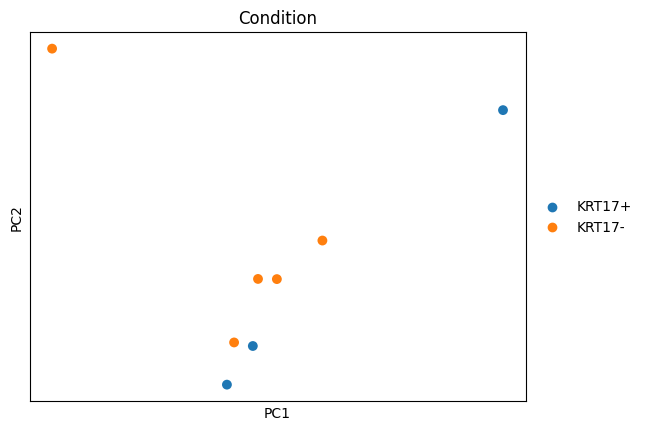

In [36]:
sc.pl.pca(dds, color='Condition', size =200)

In [91]:
import numpy as np
import seaborn as sns


In [92]:
#generate log1pmtransformed normaized expression values for blotting
dds.layers['normed_counts']

array([[ 26.41669734,   0.        ,   0.        , ..., 654.12774362,
          0.        ,   0.        ],
       [ 24.22202374,   0.        ,  14.74384054, ..., 431.7839014 ,
          2.10626293,   1.05313147],
       [106.04968006,   0.        ,   7.34997783, ..., 511.34845731,
          0.        ,   0.        ],
       ...,
       [ 48.71742204,   0.81195703,   8.11957034, ..., 238.71536799,
          2.4358711 ,   1.62391407],
       [ 30.34422968,   1.12386036,   4.49544143, ..., 454.03958489,
          0.        ,   0.        ],
       [ 41.98308025,   0.        ,   3.90540281, ..., 729.33397555,
          0.9763507 ,   0.9763507 ]])

In [93]:
dds.layers['log1p']=np.log1p(dds.layers['normed_counts'])

In [94]:
dds

AnnData object with n_obs × n_vars = 8 × 33824
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [95]:
# subset file of significant genes after normlization and log transformation
dds_sigs=dds[ :, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 476
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [96]:
# save file with pickle
with open(os.path.join('dds_sigs.pkl'),'wb')as f:
    pkl.dump(dds_sigs,f)

In [97]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

In [98]:
grapher

Sample,H24016469_S7,H24015598_S2,H24015825_S3,H24015835_S4,H24015885_S5,H24016295_S6,H24016469_S7,H24016470_S8
symbol,,,,,,,,
TNFRSF14-AS1,4.704478,1.425369,3.918996,1.809756,5.069891,3.353635,3.668964,3.805234
TNFRSF14,8.258188,6.809804,8.003494,7.019439,8.090095,7.783701,8.133051,8.277594
TNFRSF9,6.477120,5.577020,6.481651,5.177612,7.506484,6.236192,7.296755,7.026210
SLC2A5,6.745364,5.271851,7.163518,5.816030,7.017512,6.083690,6.841671,6.823035
PGD,9.052208,10.085843,9.443859,9.789138,8.040714,10.497926,8.318399,8.921011
...,...,...,...,...,...,...,...,...
SEPTIN6,8.185528,7.264763,8.509400,6.985358,7.932201,7.472898,8.028786,8.358362
CSAG3,4.881479,0.000000,3.137663,1.659649,2.879433,0.594407,3.943012,1.082720
RENBP,7.172398,6.138428,6.543981,5.944419,6.673040,5.910299,6.968896,7.445735


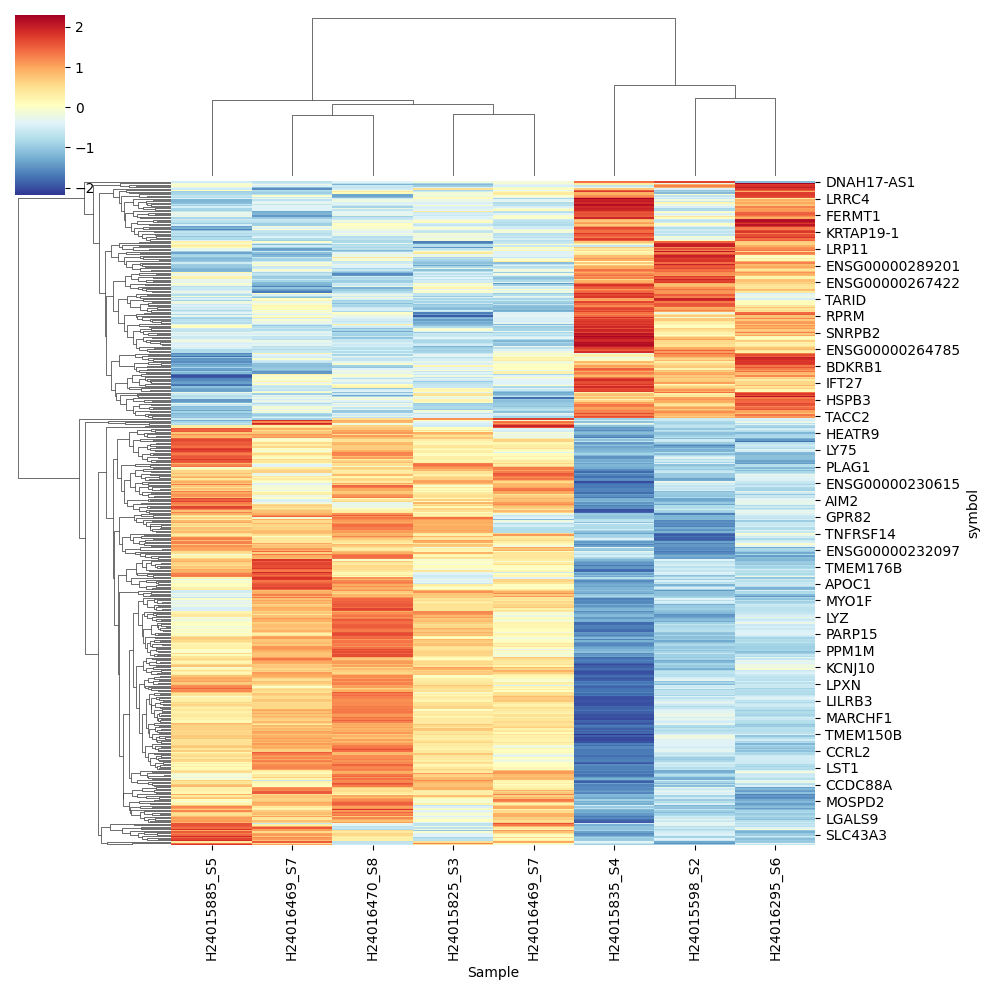

In [99]:
sns.clustermap(grapher, z_score=0, cmap='RdYlBu_r')

In [53]:
%pip install sanbomics

Note: you may need to restart the kernel to use updated packages.


In [78]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
symbol,,,,,,
WASH7P,45.760181,-0.301733,0.576216,-0.523646,0.600525,0.916650
WASH9P,283.975316,0.014618,0.519979,0.028112,0.977573,0.996596
MTATP6P1,81.605175,0.305428,1.090351,0.280119,0.779386,0.959261
SAMD11,544.736366,1.527267,0.952417,1.603570,0.108809,0.537820
NOC2L,4312.967354,0.099671,0.377748,0.263855,0.791892,0.959261
...,...,...,...,...,...,...
MT-ND4L,160.359113,-0.130037,0.424479,-0.306345,0.759342,0.955749
MT-ND4,1176.154462,0.013297,0.464682,0.028615,0.977172,0.996596
MT-ND5,804.519033,-0.230374,0.475372,-0.484619,0.627947,0.924563


In [79]:
#save res file for volcano blots
res.to_csv('deseq_output.csv', index=True)


In [80]:
import pandas as pd
df=pd.read_csv('deseq_output.csv')
df

,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,WASH7P,45.760181,-0.301733,0.576216,-0.523646,0.600525,0.916650
1,WASH9P,283.975316,0.014618,0.519979,0.028112,0.977573,0.996596
2,MTATP6P1,81.605175,0.305428,1.090351,0.280119,0.779386,0.959261
3,SAMD11,544.736366,1.527267,0.952417,1.603570,0.108809,0.537820
4,NOC2L,4312.967354,0.099671,0.377748,0.263855,0.791892,0.959261
...,...,...,...,...,...,...,...
19415,MT-ND4L,160.359113,-0.130037,0.424479,-0.306345,0.759342,0.955749
19416,MT-ND4,1176.154462,0.013297,0.464682,0.028615,0.977172,0.996596
19417,MT-ND5,804.519033,-0.230374,0.475372,-0.484619,0.627947,0.924563
19418,MT-ND6,22.234620,-0.620287,0.539697,-1.149325,0.250422,0.729840


In [5]:
# volcano blot works directly on res file for all genes 
%pip install sanbomics
from sanbomics.plots import volcano

Note: you may need to restart the kernel to use updated packages.


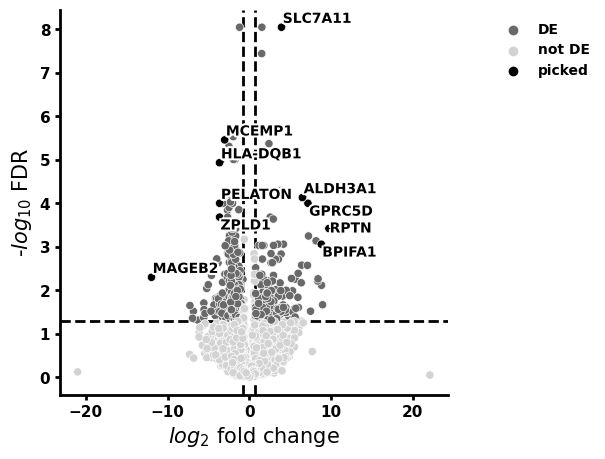

In [81]:
volcano('deseq_output.csv')

In [14]:
#works also with pandas df when inputs are specified
df

,Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,WASH7P,45.760181,-0.301733,0.576216,-0.523646,0.600525,0.916650
1,WASH9P,283.975316,0.014618,0.519979,0.028112,0.977573,0.996596
2,MTATP6P1,81.605175,0.305428,1.090351,0.280119,0.779386,0.959261
3,SAMD11,544.736366,1.527267,0.952417,1.603570,0.108809,0.537820
4,NOC2L,4312.967354,0.099671,0.377748,0.263855,0.791892,0.959261
...,...,...,...,...,...,...,...
19415,MT-ND4L,160.359113,-0.130037,0.424479,-0.306345,0.759342,0.955749
19416,MT-ND4,1176.154462,0.013297,0.464682,0.028615,0.977172,0.996596
19417,MT-ND5,804.519033,-0.230374,0.475372,-0.484619,0.627947,0.924563
19418,MT-ND6,22.234620,-0.620287,0.539697,-1.149325,0.250422,0.729840


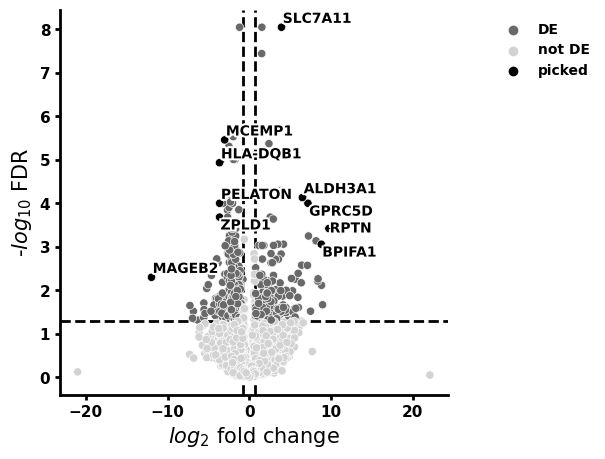

In [84]:
volcano(df, pvalue='padj', log2fc='log2FoldChange', symbol='symbol')

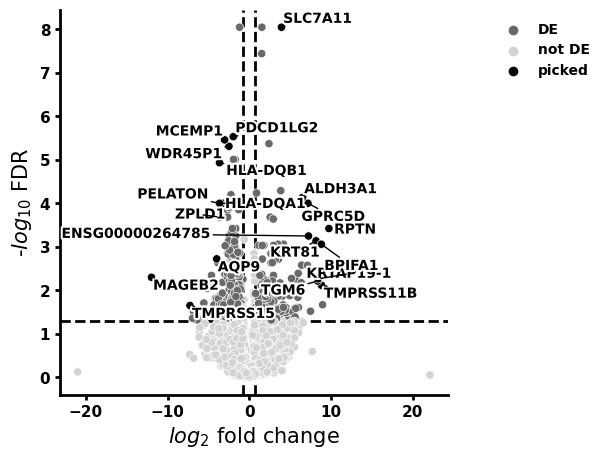

In [86]:
#top 10 up and dow genes
volcano(df,pvalue='padj', log2fc='log2FoldChange', symbol='symbol', to_label=10)

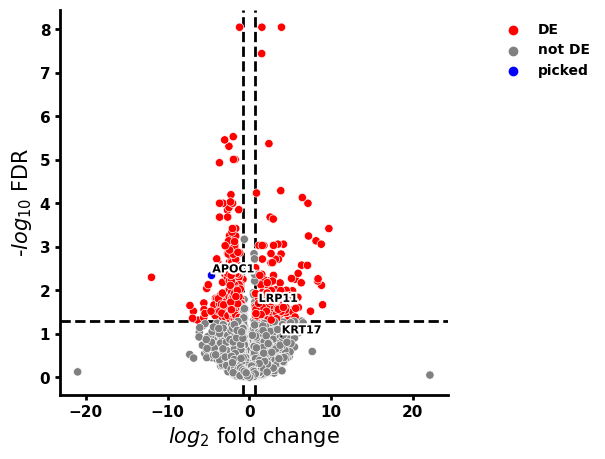

In [107]:
# selected genes 
volcano(df,pvalue='padj', log2fc='log2FoldChange', symbol='symbol', 
        to_label=['KRT17', 'APOC1','LRP11'], colors=['red', 'grey', 'blue'],
       fontsize=8, save=True)

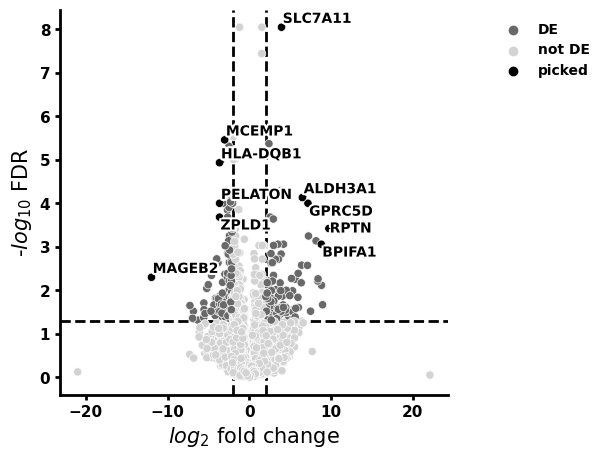

In [27]:
# change log2fold barriers
volcano(df, pvalue='padj', log2fc='log2FoldChange', symbol='Symbol', log2fc_thresh=2)

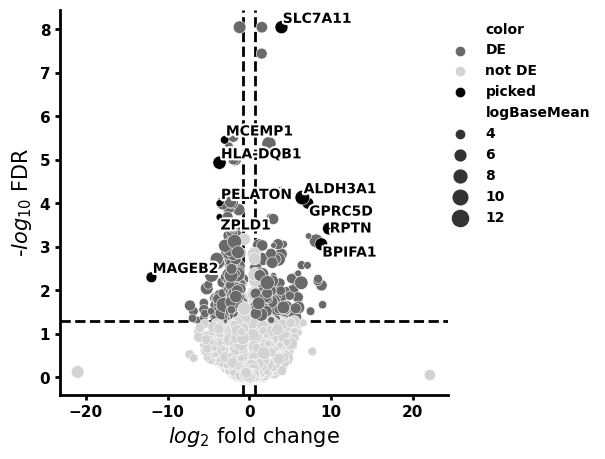

In [28]:
# change size dependet on basal expression
volcano(df, pvalue='padj', log2fc='log2FoldChange', symbol='Symbol', baseMean='baseMean')


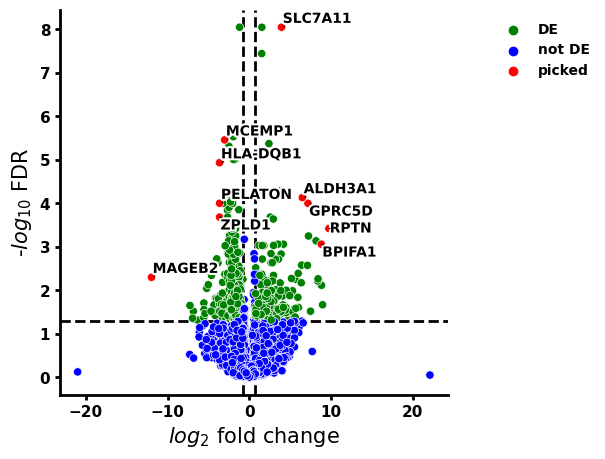

In [30]:
#change colors
volcano(df, pvalue='padj', log2fc='log2FoldChange', symbol='Symbol', colors=['green', 'blue', 'red'])